**Load and Save the images**

In [2]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data = cv2.imread('/content/drive/My Drive/computer_vision/8.jpg')
data

array([[[ 29,  26,  42],
        [ 28,  25,  41],
        [ 24,  21,  37],
        ...,
        [164, 169, 168],
        [164, 169, 168],
        [164, 169, 168]],

       [[ 19,  16,  32],
        [ 20,  17,  33],
        [ 22,  19,  35],
        ...,
        [174, 179, 178],
        [171, 176, 175],
        [168, 173, 172]],

       [[ 23,  20,  36],
        [ 25,  22,  38],
        [ 28,  25,  41],
        ...,
        [177, 182, 181],
        [173, 178, 177],
        [165, 170, 169]],

       ...,

       [[229, 231, 231],
        [231, 233, 233],
        [234, 236, 236],
        ...,
        [ 80,  83,  87],
        [ 77,  81,  82],
        [ 79,  83,  84]],

       [[227, 229, 229],
        [232, 234, 234],
        [235, 237, 237],
        ...,
        [ 85,  88,  92],
        [ 85,  89,  90],
        [ 86,  90,  91]],

       [[227, 229, 229],
        [232, 234, 234],
        [235, 237, 237],
        ...,
        [ 87,  90,  94],
        [ 87,  91,  92],
        [ 88,  92,  93]]

In [5]:
from google.colab.patches import cv2_imshow

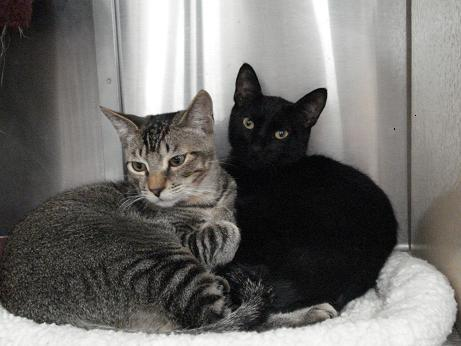

In [6]:

cv2_imshow(data)
cv2.waitKey(0)
cv2.destroyAllWindows()



In [7]:
#pylab.savefig('/content/drive/My Drive/computer_vision/8_new3.png') 


In [8]:
print(data.shape)

(346, 461, 3)


In [9]:
print(data.shape[0])

346


In [10]:
import pylab

In [11]:
cv2.imwrite('/content/drive/My Drive/computer_vision/8_new.jpg', data)

True

In [12]:
cv2.imwrite('/content/drive/My Drive/computer_vision/8_new.png', data)

True

**Detect Face and Eyes using HaarCascade classifier with images** 

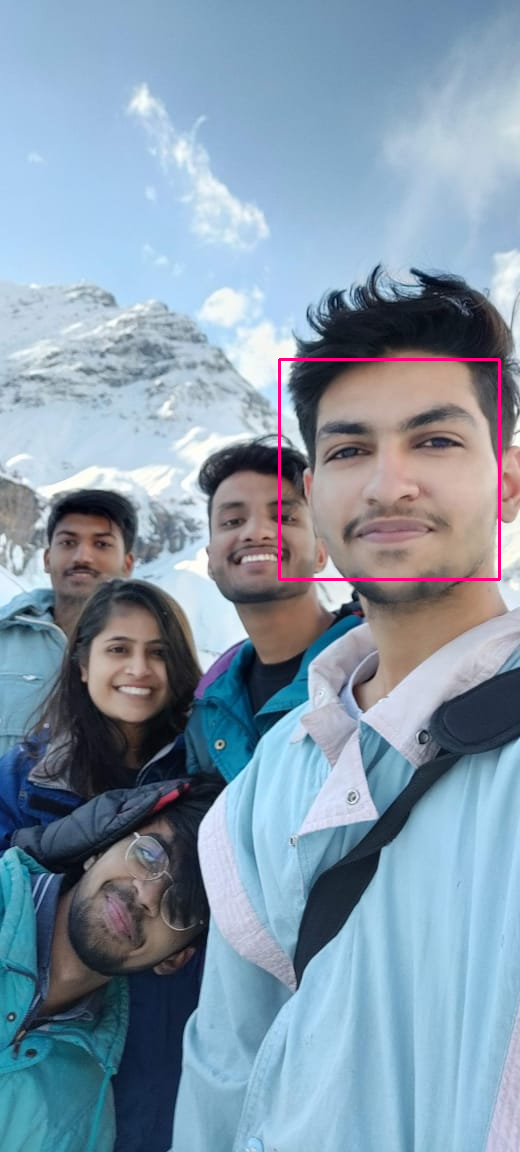

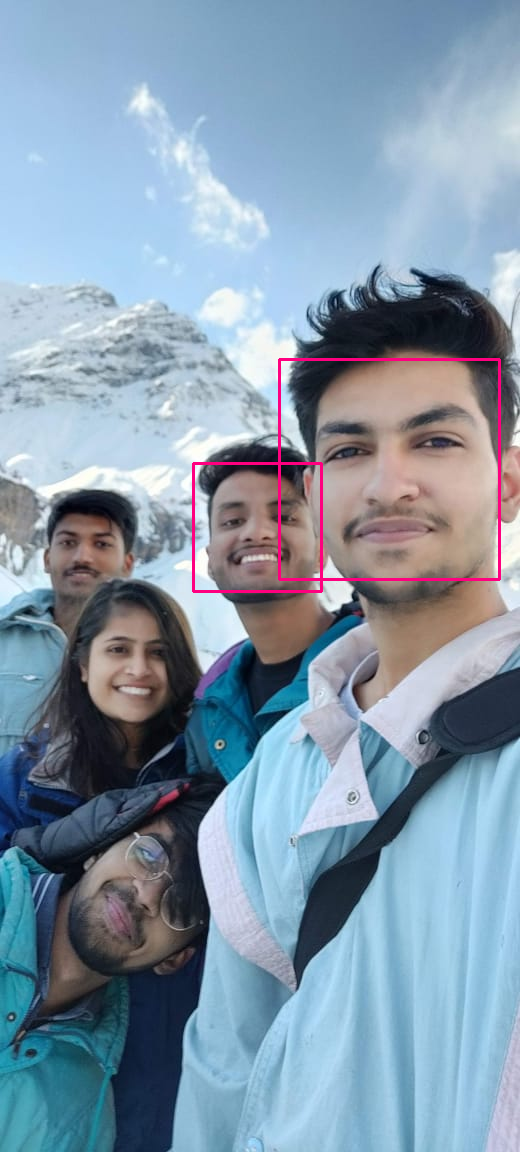

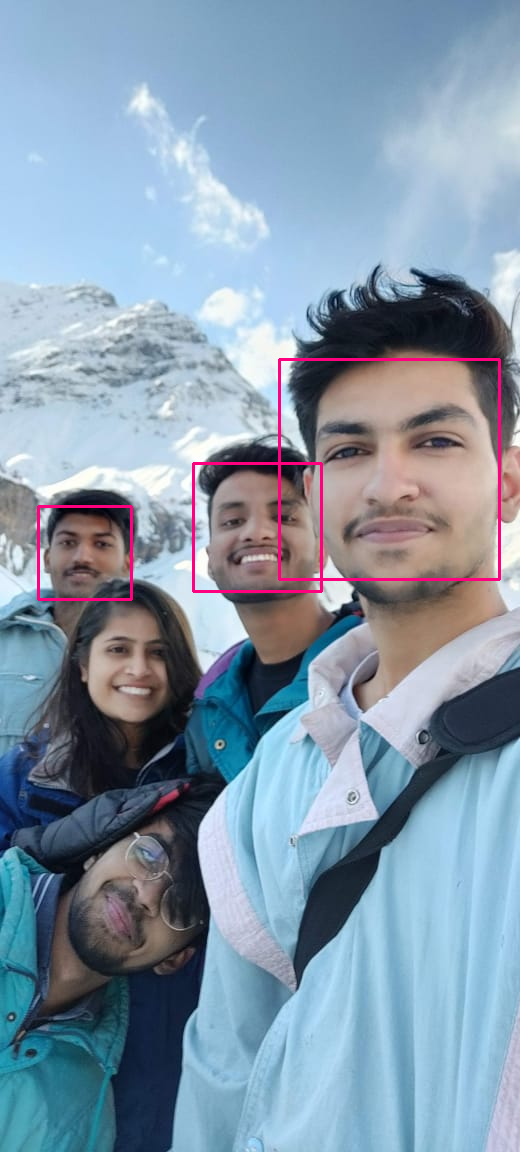

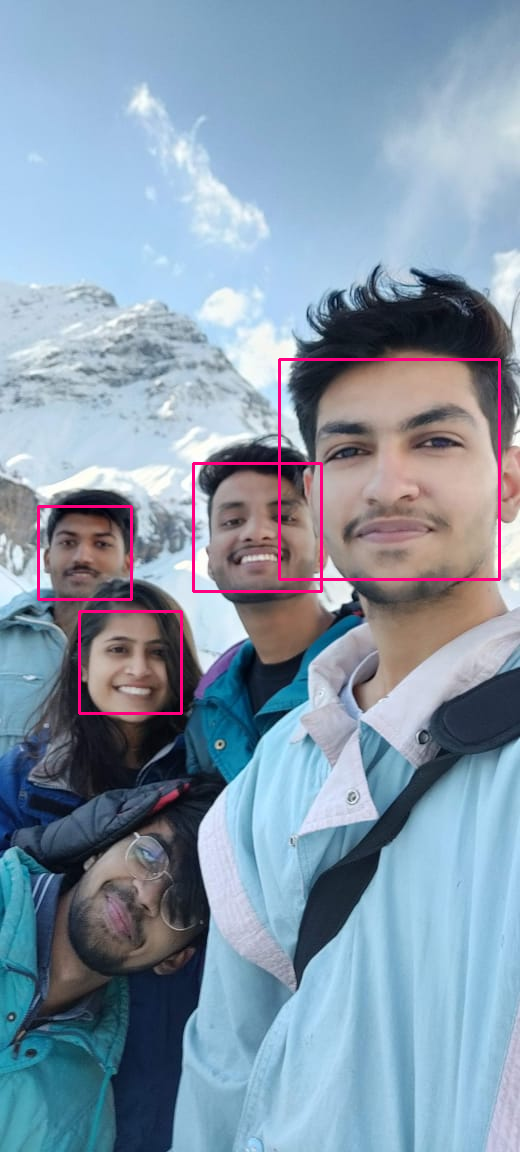

In [13]:
face_clasifier = cv2.CascadeClassifier('/content/drive/My Drive/computer_vision/haar-cascade-files-master/haarcascade_frontalface_default.xml')

image = cv2.imread('/content/drive/My Drive/computer_vision/manali.jpeg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

faces = face_clasifier.detectMultiScale(gray, 1.3, 5)

if faces is ():
  print("No Faces Found")

for (x,y,w,h) in faces:
   cv2.rectangle(image, (x,y), (x+w, y+h), (127, 0, 255), 2)
   cv2_imshow(image)
   #cv2.addText(gray, "Face Detection", (x,y),nameFont = 'Times',  pointSize=12)
   cv2.waitKey(0)

cv2.destroyAllWindows()



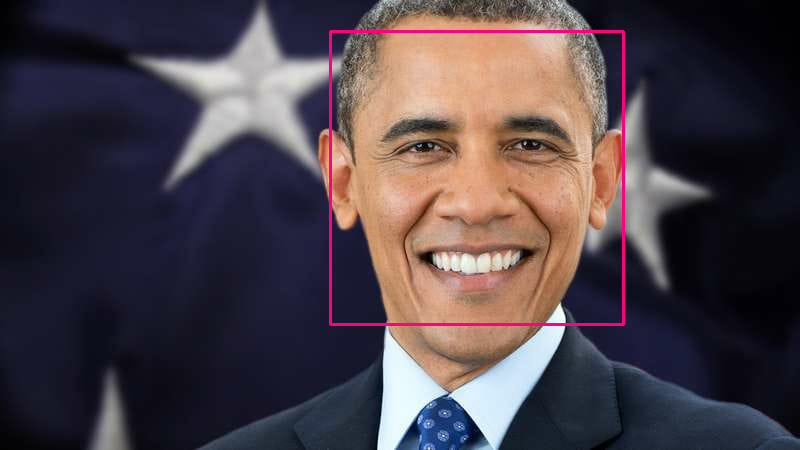

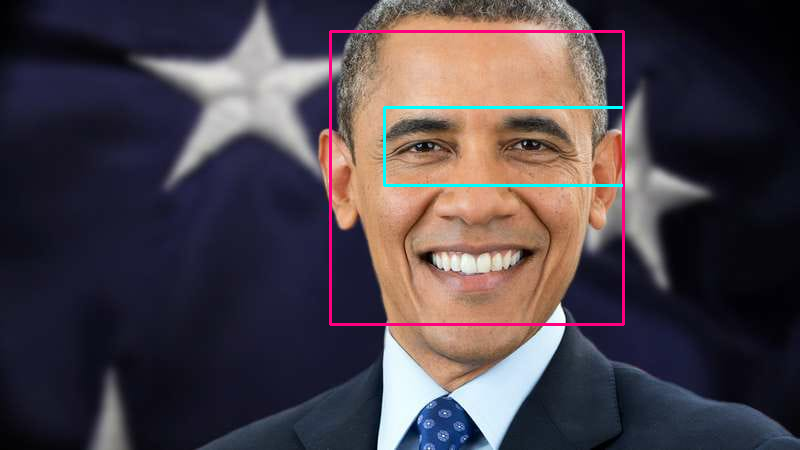

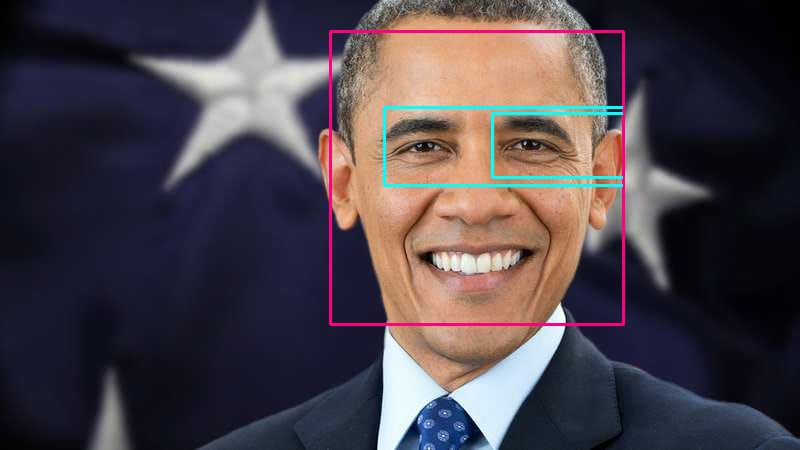

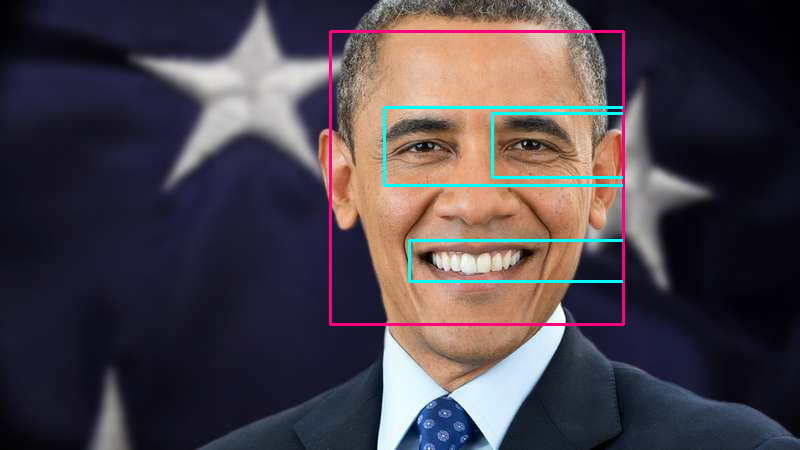

In [14]:
face_clasifier = cv2.CascadeClassifier('/content/drive/My Drive/computer_vision/haar-cascade-files-master/haarcascade_frontalface_default.xml')
eye_clasifier = cv2.CascadeClassifier('/content/drive/My Drive/computer_vision/haar-cascade-files-master/haarcascade_eye.xml')

image = cv2.imread('/content/drive/My Drive/computer_vision/obama.jpeg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

faces = face_clasifier.detectMultiScale(gray, 1.3, 5)

if faces is ():
  print("No Faces Found")

for (x,y,w,h) in faces:
   cv2.rectangle(image, (x,y), (x+w, y+h), (127, 0, 255), 2)
   cv2_imshow(image)
   #cv2.addText(gray, "Face Detection", (x,y),nameFont = 'Times',  pointSize=12)
   cv2.waitKey(0)
   roi_gray = gray[y:y+h, x:x+w] #crop out the face part from the whle gray image
   roi_color = image[y:y+h, x:x+w] # crop out face from color image
   eyes = eye_clasifier.detectMultiScale(roi_gray)
   for (ex,ey,eh,ew) in eyes:
     cv2.rectangle(roi_color, (ex,ey), (ex+w,ey+eh),(255, 255, 0),2)
     cv2_imshow(image)
     cv2.waitKey(0)
    
cv2.destroyAllWindows()



**Detect Faces and Eyes using video/ Webcam using HaarCascade Classifier**

In [15]:
face_clasifier = cv2.CascadeClassifier('/content/drive/My Drive/computer_vision/haar-cascade-files-master/haarcascade_frontalface_default.xml')
eye_clasifier = cv2.CascadeClassifier('/content/drive/My Drive/computer_vision/haar-cascade-files-master/haarcascade_eye.xml')

 
def detect(gray, frame):
   faces = face_clasifier.detectMultiScale(gray, 1.3, 5)
   for (x,y,w,h) in faces:
      cv2.rectangle(image, (x,y), (x+w, y+h), (127, 0, 255), 2)
      roi_gray = gray[y:y+h, x:x+w] #crop out the face part from the whle gray image
      roi_color = image[y:y+h, x:x+w] # crop out face from color image
      eyes = eye_clasifier.detectMultiScale(roi_gray)
      for (ex,ey,eh,ew) in eyes:
        cv2.rectangle(roi_color, (ex,ey), (ex+w,ey+eh),(255, 255, 0),2)
  
   return frame 
#cv2.destroyAllWindows()

    




**Camera Capture using webcam on colab**

In [16]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='/content/drive/My Drive/computer_vision/photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to /content/drive/My Drive/computer_vision/photo.jpg


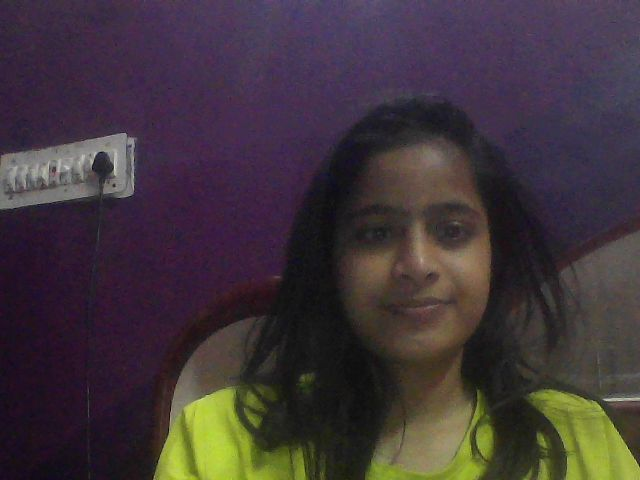

In [17]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

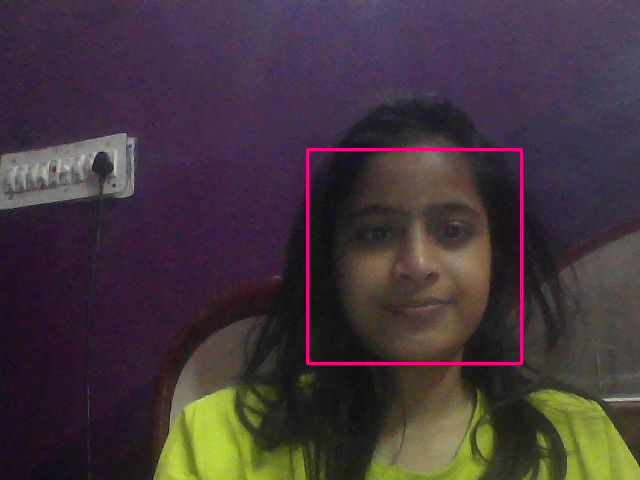

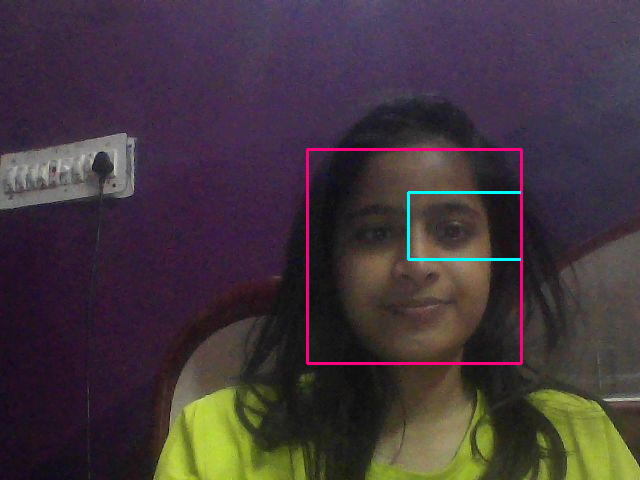

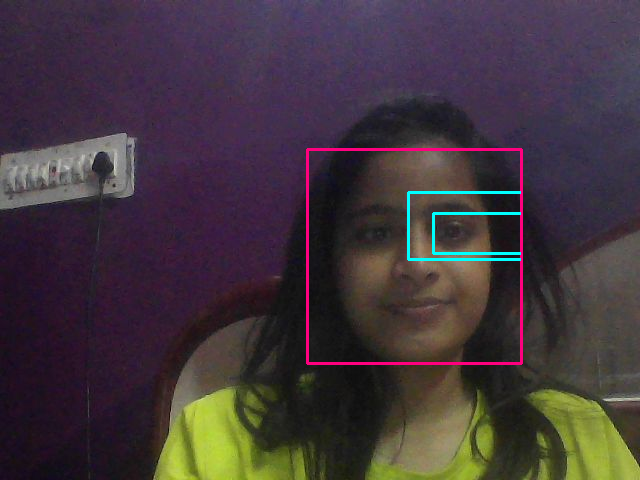

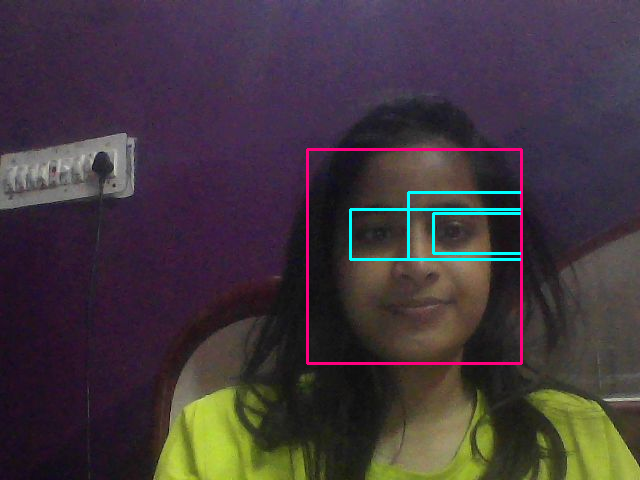

In [18]:
face_clasifier = cv2.CascadeClassifier('/content/drive/My Drive/computer_vision/haar-cascade-files-master/haarcascade_frontalface_default.xml')
eye_clasifier = cv2.CascadeClassifier('/content/drive/My Drive/computer_vision/haar-cascade-files-master/haarcascade_eye.xml')

image = cv2.imread('/content/drive/My Drive/computer_vision/photo.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

faces = face_clasifier.detectMultiScale(gray, 1.3, 5)

if faces is ():
  print("No Faces Found")

for (x,y,w,h) in faces:
   cv2.rectangle(image, (x,y), (x+w, y+h), (127, 0, 255), 2)
   cv2_imshow(image)
   #cv2.addText(gray, "Face Detection", (x,y),nameFont = 'Times',  pointSize=12)
   cv2.waitKey(0)
   roi_gray = gray[y:y+h, x:x+w] #crop out the face part from the whle gray image
   roi_color = image[y:y+h, x:x+w] # crop out face from color image
   eyes = eye_clasifier.detectMultiScale(roi_gray)
   for (ex,ey,eh,ew) in eyes:
     cv2.rectangle(roi_color, (ex,ey), (ex+w,ey+eh),(255, 255, 0),2)
     cv2_imshow(image)
     cv2.waitKey(0)
    
cv2.destroyAllWindows()

**Pedestrain Detection using image**

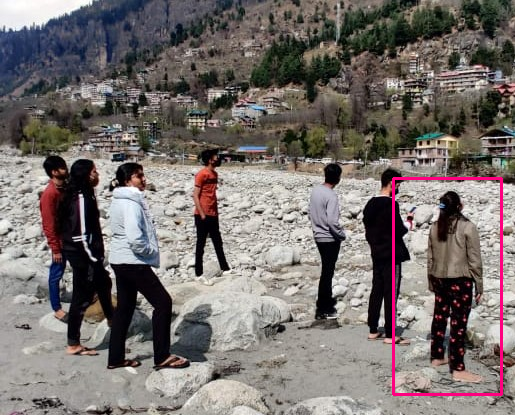

In [19]:
body_clasifier = cv2.CascadeClassifier('/content/drive/My Drive/computer_vision/haar-cascade-files-master/haarcascade_fullbody.xml')

image = cv2.imread('/content/drive/My Drive/computer_vision/ped_manali.jpeg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

body = body_clasifier.detectMultiScale(gray, 1.2, 3)

if body is ():
  print("No Faces Found")

for (x,y,w,h) in body:
   cv2.rectangle(image, (x,y), (x+w, y+h), (127, 0, 255), 2)
   cv2_imshow(image)
   #cv2.addText(gray, "Face Detection", (x,y),nameFont = 'Times',  pointSize=12)
   cv2.waitKey(0)

cv2.destroyAllWindows()



**Capturing the video through webcam and detect the face and eye during the capturing**


In [20]:
# import dependencies
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time

In [21]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [22]:
# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;
    
    var pendingResolve = null;
    var shutdown = false;
    
    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }
    
    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }
    
    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);
      
      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);
           
      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);
      
      const instruction = document.createElement('div');
      instruction.innerHTML = 
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };
      
      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);
      
      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();
      
      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }
            
      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }
      
      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;
      
      return {'create': preShow - preCreate, 
              'show': preCapture - preShow, 
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)
  
def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

In [24]:
face_cascade = cv2.CascadeClassifier('/content/drive/My Drive/computer_vision/haar-cascade-files-master/haarcascade_frontalface_default.xml')
eye_clasifier = cv2.CascadeClassifier('/content/drive/My Drive/computer_vision/haar-cascade-files-master/haarcascade_eye.xml')
# start streaming video from webcam
video_stream()
# label for video
label_html = 'Capturing...'
# initialze bounding box to empty
bbox = ''
count = 0 
while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # convert JS response to OpenCV Image
    img = js_to_image(js_reply["img"])

    # create transparent overlay for bounding box
    bbox_array = np.zeros([480,640,4], dtype=np.uint8)

    # grayscale image for face detection
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    # get face region coordinates
    faces = face_cascade.detectMultiScale(gray)
    # get face bounding box for overlay
    for (x,y,w,h) in faces:
      bbox_array = cv2.rectangle(bbox_array,(x,y),(x+w,y+h),(255,0,0),2)
      roi_gray = gray[y:y+h, x:x+w] #crop out the face part from the whle gray image
      roi_color = bbox_array[y:y+h, x:x+w] # crop out face from color image
      eyes = eye_clasifier.detectMultiScale(roi_gray)
      for (ex,ey,eh,ew) in eyes:
        cv2.rectangle(roi_color, (ex,ey), (ex+w,ey+eh),(255, 255, 0),2)
     

    bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
    # convert overlay of bbox into bytes
    bbox_bytes = bbox_to_bytes(bbox_array)
    # update bbox so next frame gets new overlay
    bbox = bbox_bytes

<IPython.core.display.Javascript object>